In [23]:
!pip install opencv-python

In [24]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Questão 1

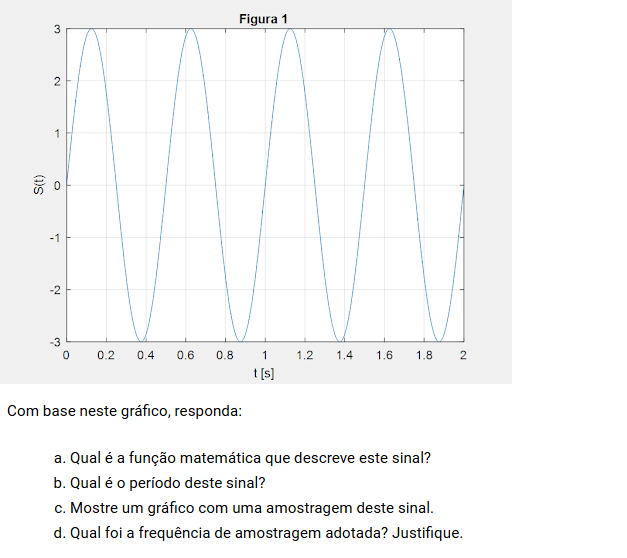

In [25]:
img = Image.open("q1.png")
display(img)

### a)

A função do sinal é dada por:

$$
x(t) = A \cdot \sin(2\pi \cdot f\cdot t + \varphi)
$$

Para o sinal dado, $f = 2\,\text{Hz}$ (completa 2 ciclos em 1 segundo), logo:

$$
x(t) = 3 \cdot \sin(2\pi \cdot 2 \cdot t + 0) = 3 \cdot \sin(4 \cdot \pi \cdot t)
$$

---

### b)

O período é dado por:

$$
T = \frac{1}{f} = \frac{1}{2} = 0{,}5\,\text{s}
$$


### c)

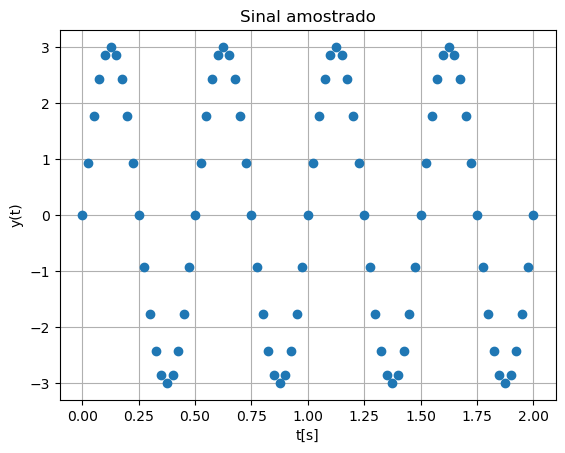

In [26]:
A = 3
f = 2
phi = 0

f_amostragem = f * 20
t_inicial = 0
t_final = 2
dt = 1 / f_amostragem

arr_T_amostrado = np.arange(t_inicial, t_final + dt, dt)

y_amostrado = A * np.sin(2 * np.pi * f * arr_T_amostrado + phi)

plt.plot(arr_T_amostrado, y_amostrado, 'o')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.title('Sinal amostrado')
plt.grid()
plt.show()

### d)

A frequência de amostragem foi selecionada como sendo 20x a frequência do sinal. Dado o Teorema de Nyquist que estipula o limite mínimo da frequência como sendo f_a >= 2.f_s, escolhemos uma resolução 10x maior que o mínimo estipulado para melhor clareza do sinal.

# Questão 2

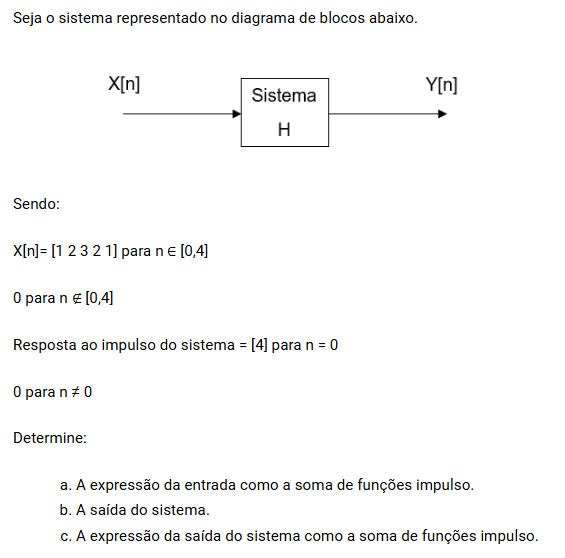

In [27]:
img = Image.open("q2.png")
display(img)

a) A entrada do sistema descrita por uma soma de funções impulso do tipo δ[n] é dada por: 
$$
X[n] = 1\cdot\delta[n] + 2\cdot\delta[n-1] + 3\cdot\delta[n-2] + 2\cdot\delta[n-3] + 1\cdot\delta[n-4]
$$

In [38]:
x = np.array([1, 2, 3, 2, 1])
h = np.array([4])

y = np.convolve(x, h)

print("y[n] =", y)

y[n] = [ 4  8 12  8  4]


c) A saída do sistema descrita por uma soma de funções impulso do tipo δ[n] é dada por

$$
y[n] = 4\cdot\delta[n] + 8\cdot\delta[n-1] + 12\cdot\delta[n-2] + 8\cdot\delta[n-3] + 4\cdot\delta[n-4]
$$

# Questão 3

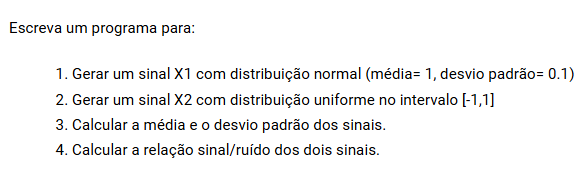

In [29]:
img = Image.open("q3.png")
display(img)

In [30]:
N = 1000

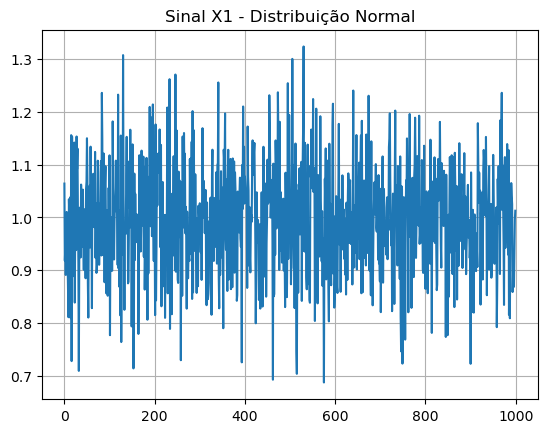

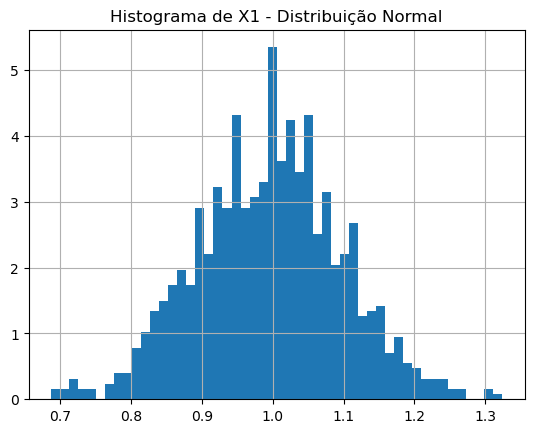

In [31]:
X1 = np.random.normal(1, 0.1, N)

plt.figure()
plt.plot(X1)
plt.title('Sinal X1 - Distribuição Normal')
plt.grid(True)

plt.figure()
plt.hist(X1, bins=50, density=True)
plt.title('Histograma de X1 - Distribuição Normal')
plt.grid(True)

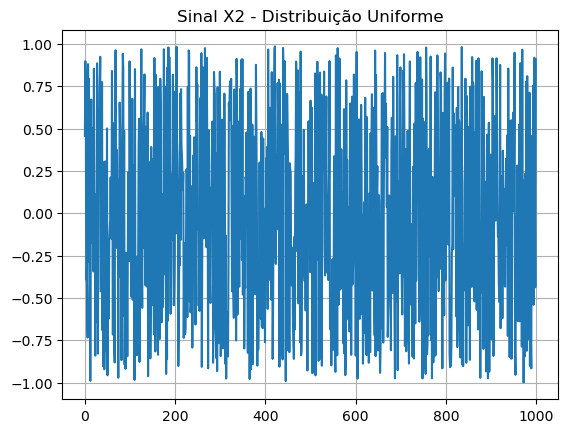

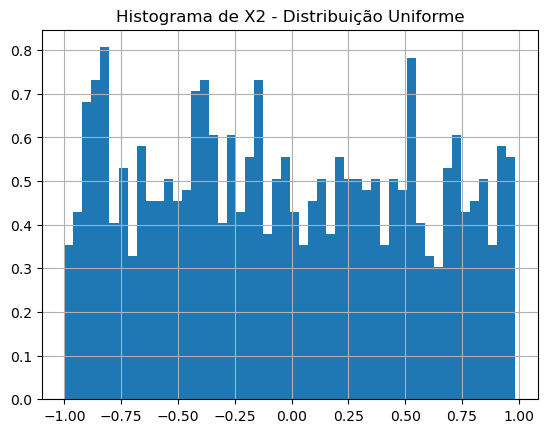

In [32]:
X2 = np.random.uniform(-1, 1, N)

plt.figure()
plt.plot(X2)
plt.title('Sinal X2 - Distribuição Uniforme')
plt.grid(True)

plt.figure()
plt.hist(X2, bins=50, density=True)
plt.title('Histograma de X2 - Distribuição Uniforme')
plt.grid(True)

In [40]:
media_X1 = np.mean(X1)
desvio_X1 = np.std(X1)

media_X2 = np.mean(X2)
desvio_X2 = np.std(X2)

print("Média X1:", media_X1)
print("Desvio padrão X1:", desvio_X1)
print("---")
print("Média X2:", media_X2)
print("Desvio padrão X2:", desvio_X2)

Média X1: 0.9953255104806238
Desvio padrão X1: 0.10224384732848998
---
Média X2: -0.033043788503821364
Desvio padrão X2: 0.5740472491026225


In [34]:
snr_X1 = media_X1 / desvio_X1
snr_X2 = media_X2 / desvio_X2

print("SNR X1:", snr_X1)
print("SNR X2:", snr_X2)

SNR X1: 9.734820592996982
SNR X2: -0.05756283747631743


# Questão 4

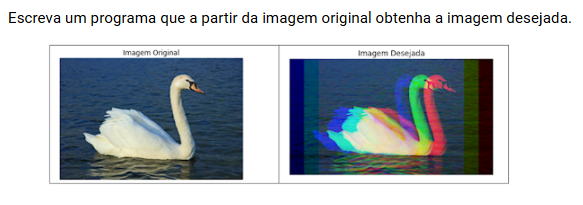

In [35]:
img = Image.open("q4.png")
display(img)

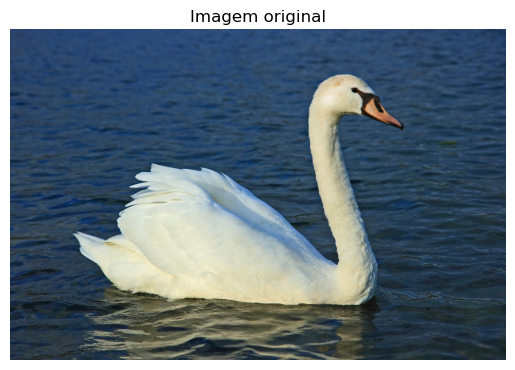

In [42]:
img = cv2.imread('cisne.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title('Imagem original')
plt.show()

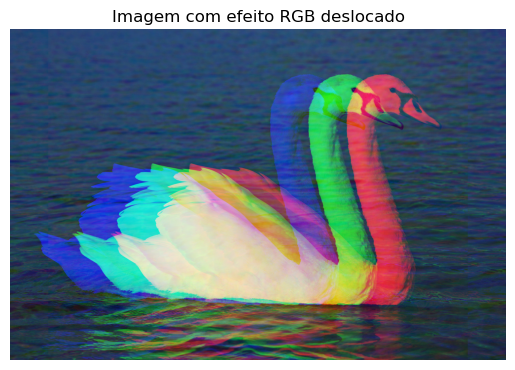

In [44]:
rows, cols, _ = img.shape

shift_r = 300
shift_g = 0
shift_b = -300

R = np.roll(img[:, :, 0], shift_r, axis=1)
G = np.roll(img[:, :, 1], shift_g, axis=1)
B = np.roll(img[:, :, 2], shift_b, axis=1)

glitch_img = np.zeros_like(img)
glitch_img[:, :, 0] = R
glitch_img[:, :, 1] = G
glitch_img[:, :, 2] = B

plt.imshow(glitch_img)
plt.axis('off')
plt.title('Imagem com efeito RGB deslocado')
plt.show()